In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
import tensorflow as tf
import numpy as np

In [31]:
from tensorflow import keras

## Fashion MNIST dataset

In [32]:
fashion_mnist = keras.datasets.fashion_mnist

In [33]:
(x_train, y_train), (x_test, y_test)=fashion_mnist.load_data()

In [34]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [35]:
x_valid,x_train = x_train[:5000]/255.0,x_train[5000:]/255.0
y_valid,y_train = y_train[:5000], y_train[5000:]

In [36]:
list(map(np.shape,[x_valid,x_train]))

[(5000, 28, 28), (55000, 28, 28)]

In [37]:
y_train[0]

4

In [38]:
class_names="T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot".split(",")

In [39]:
class_names[y_train[0]]

'Coat'

In [40]:
model=keras.models.Sequential(name="Fashion-Mnist-Classification-Model")


In [41]:
from keras.layers.core.dense import Dense

In [42]:
model.add(keras.layers.Flatten(input_shape=[28,28]))

In [43]:
model.add(Dense(units=300, activation="relu"))

In [44]:
model.add(Dense(units=100, activation="relu"))

In [45]:
model.add(Dense(units=10, activation="softmax"))

In [46]:
model.summary()

Model: "Fashion-Mnist-Classification-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [47]:
784*300+300

235500

## Checking the return type of get_weights function of layers object

In [48]:
list(map(lambda x:type(x.get_weights()),model.layers[1:]))

[list, list, list]

## Checking the length of list

In [49]:
list(map(lambda x:len(x.get_weights()),model.layers[1:]))

[2, 2, 2]

## Checking the shape of each element as every item in list is array

In [50]:
list(map(lambda x:x.get_weights()[0].shape,model.layers[1:]))

[(784, 300), (300, 100), (100, 10)]

In [51]:
## Checking the bias for each layer of hidden layer

In [52]:
list(map(lambda x:x.get_weights()[1].shape,model.layers[1:]))

[(300,), (100,), (10,)]

In [53]:
model.compile(optimizer="sgd",
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=[keras.metrics.sparse_categorical_accuracy]
             )              

In [54]:
history = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 929us/step - loss: 0.7301 - sparse_categorical_accuracy: 0.7580 - val_loss: 0.5003 - val_sparse_categorical_accuracy: 0.8330
Epoch 2/30
1719/1719 [==============================] - 2s 892us/step - loss: 0.4916 - sparse_categorical_accuracy: 0.8285 - val_loss: 0.4621 - val_sparse_categorical_accuracy: 0.8372
Epoch 3/30
1719/1719 [==============================] - 2s 889us/step - loss: 0.4452 - sparse_categorical_accuracy: 0.8427 - val_loss: 0.4428 - val_sparse_categorical_accuracy: 0.8448
Epoch 4/30
1719/1719 [==============================] - 2s 891us/step - loss: 0.4178 - sparse_categorical_accuracy: 0.8521 - val_loss: 0.3929 - val_sparse_categorical_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 2s 923us/step - loss: 0.3973 - sparse_categorical_accuracy: 0.8605 - val_loss: 0.3808 - val_sparse_categorical_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 2s 909us/step - loss: 0.

In [55]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 823us/step - loss: 72.8014 - sparse_categorical_accuracy: 0.8292


[72.80142211914062, 0.829200029373169]

In [57]:
import pandas as pd

In [59]:
df = pd.DataFrame(history.history)

<AxesSubplot:>

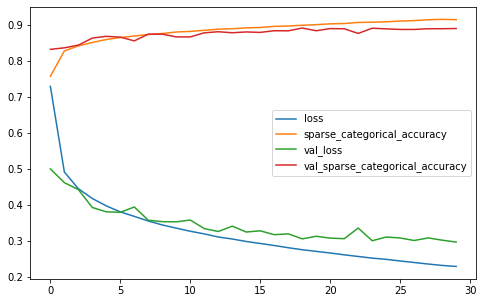

In [60]:
df.plot(figsize=(8,5))